In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
# Số lượng mẫu mong muốn
TARGET_HARMFUL = 450
TARGET_NOT_HARMFUL = 550

# --- Tự động tìm đường dẫn ---
ROOT_DIR = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
CRAWL_DIR = os.path.join(ROOT_DIR, "data", "crawl")

# File Input (File master lớn 4000 dòng)
INPUT_CSV_BIG = os.path.join(CRAWL_DIR, "tiktok_links.csv")

# File Output (File mẫu 1000 dòng)
OUTPUT_CSV_SMALL = os.path.join(CRAWL_DIR, "sub_tiktok_links.csv")

# Dùng một số cố định (42) để đảm bảo script luôn lấy
# cùng một mẫu ngẫu nhiên mỗi khi chạy.
RANDOM_SEED = 42

print("ROOT_DIR: ", ROOT_DIR)
print("CRAWL_DIR: ", CRAWL_DIR)
print("INPUT_CSV_BIG: ", INPUT_CSV_BIG)
print("OUTPUT_CSV_SMALL: ", OUTPUT_CSV_SMALL)



ROOT_DIR:  /home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development
CRAWL_DIR:  /home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development/data/crawl
INPUT_CSV_BIG:  /home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development/data/crawl/tiktok_links.csv
OUTPUT_CSV_SMALL:  /home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development/data/crawl/sub_tiktok_links.csv


# EDA function

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda_tiktok_advanced_labelwise(df, top_n_per_label=5, random_seed=42):
    """
    Hàm EDA nâng cao cho dataset TikTok với top hashtags riêng theo label.

    Args:
        df (pd.DataFrame): DataFrame có các cột ['hashtag', 'link', 'label']
        top_n_per_label (int): số lượng hashtag hàng đầu cho mỗi label
        random_seed (int): để cố định khi cần shuffle
    """
    print("=== Thông tin cơ bản ===")
    display(df.info())
    print("\n=== 10 dòng đầu tiên ===")
    display(df.head(10))
    
    print("\n=== Thống kê mô tả ===")
    display(df.describe(include='all'))
    
    # --- Phân bố nhãn ---
    print("\n=== Phân bố nhãn (label) ===")
    label_counts = df['label'].value_counts()
    print(label_counts)
    
    plt.figure(figsize=(6,6))
    label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title("Phân bố nhãn (label)")
    plt.ylabel("")
    plt.show()
    
    # --- Top hashtags riêng cho từng label ---
    # --- Top hashtags riêng cho từng label ---
    print(f"\n=== Top {top_n_per_label} hashtags cho từng label ===")
    top_hashtags_list = []
    for lbl in df['label'].unique():
        top_lbl = df[df['label']==lbl]['hashtag'].value_counts().head(top_n_per_label)
        print(f"\nLabel = {lbl}:")
        display(top_lbl)
        top_hashtags_list.extend(top_lbl.index.tolist())

    # Lấy unique hashtags từ cả 2 label
    top_hashtags_list = list(set(top_hashtags_list))

    # --- Chuẩn bị data cho barplot theo label ---
    df_top_plot = df[df['hashtag'].isin(top_hashtags_list)]
    # Tạo bảng count theo hashtag và label
    top_counts = df_top_plot.groupby(['hashtag', 'label']).size().reset_index(name='count')

    # --- Bar chart với 2 màu cho 2 label ---
    plt.figure(figsize=(10,6))
    sns.barplot(x='count', y='hashtag', hue='label', data=top_counts, palette=['#66b3ff','#ff9999'])
    plt.xlabel("Số lượng")
    plt.ylabel("Hashtag")
    plt.title(f"Tổng số lượng hashtags top {top_n_per_label} mỗi label")
    plt.legend(title="Label")
    plt.show()

    
    # --- Mối quan hệ label vs top hashtags ---
    df_top = df[df['hashtag'].isin(top_hashtags_list)]
    pivot = df_top.pivot_table(index='hashtag', columns='label', aggfunc='size', fill_value=0)
    print("\n=== Pivot table label vs hashtag ===")
    display(pivot)
    
    # Stacked bar chart với legend
    ax = pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
    plt.title(f"Label vs Top {top_n_per_label} hashtags mỗi label")
    plt.ylabel("Số lượng")
    plt.xlabel("Hashtag")
    plt.xticks(rotation=45)
    plt.legend(title="Label")
    plt.show()


# 1. Đọc file

Đang đọc file sample lớn: /home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development/data/crawl/tiktok_links.csv...
=== Thông tin cơ bản ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  4000 non-null   object
 1   link     4000 non-null   object
 2   label    4000 non-null   object
dtypes: object(3)
memory usage: 93.9+ KB


None


=== 10 dòng đầu tiên ===


,hashtag,link,label
0,gáixinh,https://www.tiktok.com/@m.nhn6763?lang=en,harmful
1,science,https://www.tiktok.com/@hashem.alghaili?lang=en,not_harmful
2,body,https://www.tiktok.com/@ravenlepardo_/video/75...,harmful
3,fitness,https://www.tiktok.com/@mirandacohenfit/video/...,not_harmful
4,fitness,https://www.tiktok.com/@anggiisanti/video/7266...,not_harmful
5,flirt,https://www.tiktok.com/@milsmanzano/video/7018...,harmful
6,motivation,https://www.tiktok.com/@smart.mentality/video/...,not_harmful
7,fakenews,https://www.tiktok.com/@bboneoseu?lang=en,harmful
8,seductive,https://www.tiktok.com/@ellisandmadspranks?lan...,harmful
9,fight,https://www.tiktok.com/@gymsoi?lang=en,harmful



=== Thống kê mô tả ===


,hashtag,link,label
count,4000,4000,4000
unique,102,4000,2
top,sachhay,https://www.tiktok.com/@m.nhn6763?lang=en,not_harmful
freq,71,1,2500



=== Phân bố nhãn (label) ===
label
not_harmful    2500
harmful        1500
Name: count, dtype: int64


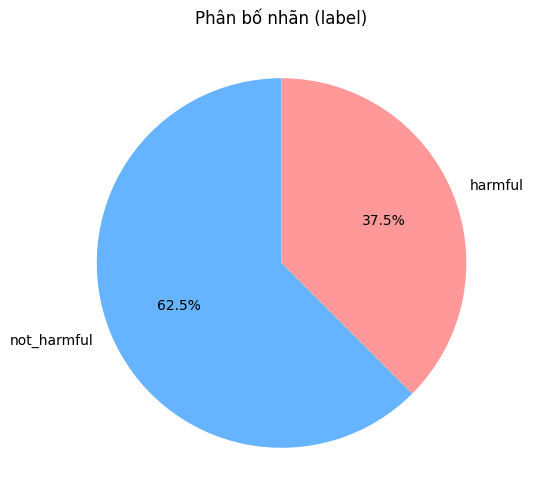


=== Top 10 hashtags cho từng label ===

Label = harmful:


hashtag
tarotreading      47
weirdchallenge    38
gáixinh           37
trippy            37
bóc_phốt          37
fakenews          37
flirt             36
reactiondrama     34
18plus            32
phóng_lợn         32
Name: count, dtype: int64


Label = not_harmful:


hashtag
sachhay         71
thethao         67
game            65
fashion         63
nauan           62
pet             60
ancungtiktok    60
car             59
quotes          59
education       59
Name: count, dtype: int64

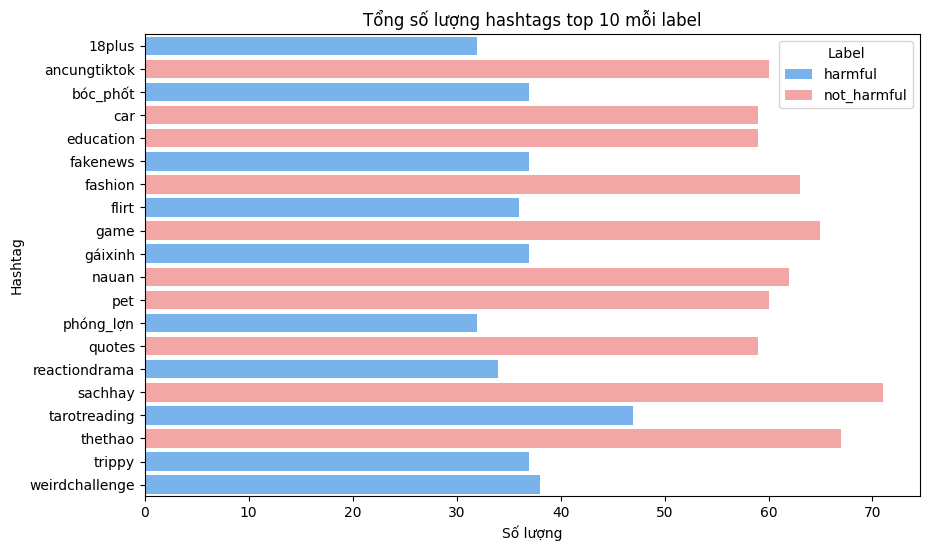


=== Pivot table label vs hashtag ===


label,harmful,not_harmful
hashtag,,
18plus,32,0
ancungtiktok,0,60
bóc_phốt,37,0
car,0,59
education,0,59
fakenews,37,0
fashion,0,63
flirt,36,0
game,0,65


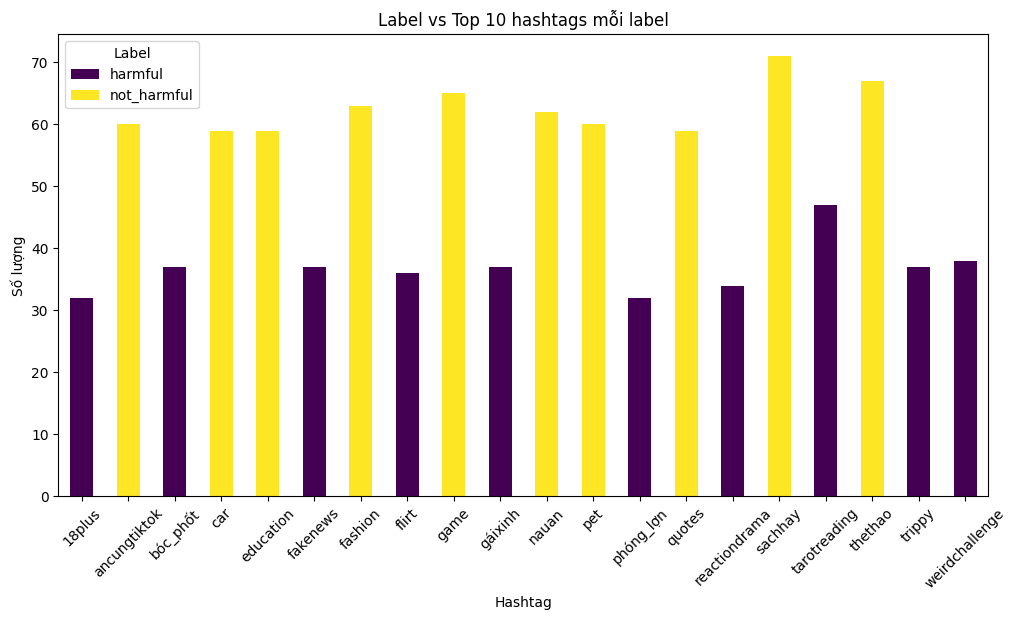

Đã tải 4000 link.


In [3]:
print(f"Đang đọc file sample lớn: {INPUT_CSV_BIG}...")


try:
    df = pd.read_csv(INPUT_CSV_BIG)
    eda_tiktok_advanced_labelwise(df, top_n_per_label=10)
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file {INPUT_CSV_BIG}")
    print("Bạn cần chạy script 'find_tiktok_links.py' trước để tạo file này.")
except Exception as e:
    print(f"Lỗi khi đọc file CSV: {e}")

print(f"Đã tải {len(df)} link.")

# 2. Phân loại

In [4]:

df_harmful = df[df["label"] == "harmful"]
df_not_harmful = df[df["label"] == "not_harmful"]

print(f"-> Tìm thấy {len(df_harmful)} harmful và {len(df_not_harmful)} not_harmful.")

-> Tìm thấy 1500 harmful và 2500 not_harmful.


In [5]:
print("Harmful label")
display(df_harmful.head(5))

print("Not harmful label")
display(df_not_harmful.head(5))

Harmful label


,hashtag,link,label
0,gáixinh,https://www.tiktok.com/@m.nhn6763?lang=en,harmful
2,body,https://www.tiktok.com/@ravenlepardo_/video/75...,harmful
5,flirt,https://www.tiktok.com/@milsmanzano/video/7018...,harmful
7,fakenews,https://www.tiktok.com/@bboneoseu?lang=en,harmful
8,seductive,https://www.tiktok.com/@ellisandmadspranks?lan...,harmful


Not harmful label


,hashtag,link,label
1,science,https://www.tiktok.com/@hashem.alghaili?lang=en,not_harmful
3,fitness,https://www.tiktok.com/@mirandacohenfit/video/...,not_harmful
4,fitness,https://www.tiktok.com/@anggiisanti/video/7266...,not_harmful
6,motivation,https://www.tiktok.com/@smart.mentality/video/...,not_harmful
10,congnghe,https://www.tiktok.com/@codinglife.vn/video/75...,not_harmful


In [6]:
# 3. Xử lý nếu không đủ mẫu
# (Ví dụ: file master chỉ có 300 'harmful' dù ta muốn 450)
n_harmful = min(TARGET_HARMFUL, len(df_harmful))
n_not_harmful = min(TARGET_NOT_HARMFUL, len(df_not_harmful))

print(f"-> Sẽ lấy {n_harmful} harmful và {n_not_harmful} not_harmful.")

-> Sẽ lấy 450 harmful và 550 not_harmful.


In [7]:
# 4. Lấy mẫu (sample)
df_harmful_sample = df_harmful.sample(n=n_harmful, random_state=RANDOM_SEED)
df_not_harmful_sample = df_not_harmful.sample(n=n_not_harmful, random_state=RANDOM_SEED)
print("df_harmful_sample:")
display(df_harmful_sample.describe(include='all'))
print("df_not_harmful_sample:")
display(df_not_harmful_sample.describe(include='all'))

df_harmful_sample:


,hashtag,link,label
count,450,450,450
unique,55,450,1
top,bikini,https://www.tiktok.com/@noraapollo/video/74961...,harmful
freq,17,1,450


df_not_harmful_sample:


,hashtag,link,label
count,550,550,550
unique,47,550,1
top,sport,https://www.tiktok.com/@volunteerforeducation/...,not_harmful
freq,18,1,550


# 5. Gộp lại

In [8]:
df_final = pd.concat([df_harmful_sample, df_not_harmful_sample], ignore_index=True)

# 6. TRỘN LẪN (SHUFFLE) - Rất quan trọng

In [9]:
# Trộn các dòng harmful và not_harmful với nhau
df_shuffled = df_final.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print("df_final:")
display(df_final.head(5))
display(df_final.info())
display(df_final.describe(include="all"))

df_final:


,hashtag,link,label
0,tarotreading,https://www.tiktok.com/@noraapollo/video/74961...,harmful
1,bay_lắc,https://www.tiktok.com/@namlun2808080/video/73...,harmful
2,weirdchallenge,https://www.tiktok.com/@poutineandpints?lang=en,harmful
3,lừa_đảo,https://www.tiktok.com/@2sao.vn/video/75349245...,harmful
4,reactiondrama,https://www.tiktok.com/@2486jxns68k/video/7558...,harmful


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1000 non-null   object
 1   link     1000 non-null   object
 2   label    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


None

,hashtag,link,label
count,1000,1000,1000
unique,102,1000,2
top,study,https://www.tiktok.com/@noraapollo/video/74961...,not_harmful
freq,18,1,550


# 7. Lưu file CSV

In [10]:

try:
    df_shuffled.to_csv(OUTPUT_CSV_SMALL, index=False, encoding="utf-8-sig")
    print(f"\n✅ HOÀN TẤT!")
    print(f"Đã lưu {len(df_shuffled)} mẫu (đã trộn) vào file:")
    print(f"{OUTPUT_CSV_SMALL}")
except Exception as e:
    print(f"\nLỖI khi lưu file CSV: {e}")



✅ HOÀN TẤT!
Đã lưu 1000 mẫu (đã trộn) vào file:
/home/guest/Projects/SE363/-UIT-_SE363-Big-Data-Platform-Application-Development/data/crawl/sub_tiktok_links.csv


# 8. KIỂM TRA DỮ LIỆU 


GIAI ĐOẠN 8: KIỂM TRA DỮ LIỆU (VERIFICATION)
Đang đọc lại file vừa lưu: sub_tiktok_links.csv...

=== Thông tin cơ bản ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1000 non-null   object
 1   link     1000 non-null   object
 2   label    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


None


=== 10 dòng đầu tiên ===


,hashtag,link,label
0,sachhay,https://www.tiktok.com/@trangsachhaytv/video/7...,not_harmful
1,quotes,https://www.tiktok.com/@ng_ahieu?lang=en,not_harmful
2,sachhay,https://www.tiktok.com/@moc_tri_vuong?lang=en,not_harmful
3,sport,https://www.tiktok.com/@ilonabasik,not_harmful
4,bikini,https://www.tiktok.com/@seoitama/video/7504544...,harmful
5,inspiration,https://www.tiktok.com/@sedyyfilms/video/75377...,not_harmful
6,environment,https://www.tiktok.com/@teachstarteraustralia?...,not_harmful
7,meditation,https://www.tiktok.com/@soul_mind_body?lang=en,not_harmful
8,travel,https://www.tiktok.com/@nihao.trip/video/75687...,not_harmful
9,drama,https://www.tiktok.com/@rafournine/video/74916...,harmful



=== Thống kê mô tả ===


,hashtag,link,label
count,1000,1000,1000
unique,102,1000,2
top,sport,https://www.tiktok.com/@trangsachhaytv/video/7...,not_harmful
freq,18,1,550



=== Phân bố nhãn (label) ===
label
not_harmful    550
harmful        450
Name: count, dtype: int64


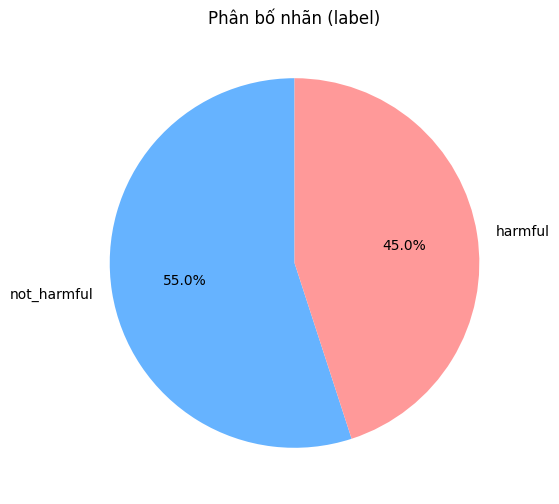


=== Top 10 hashtags cho từng label ===

Label = not_harmful:


hashtag
sport          18
study          18
sachhay        16
selfcare       16
environment    16
game           14
thucung        14
education      14
motivation     14
plant          14
Name: count, dtype: int64


Label = harmful:


hashtag
bikini            17
tarotreading      15
toxic             13
phóng_lợn         13
seductive         12
prankgonewrong    11
reactiondrama     11
ghosthunting      11
troll             11
bóc_phốt          11
Name: count, dtype: int64

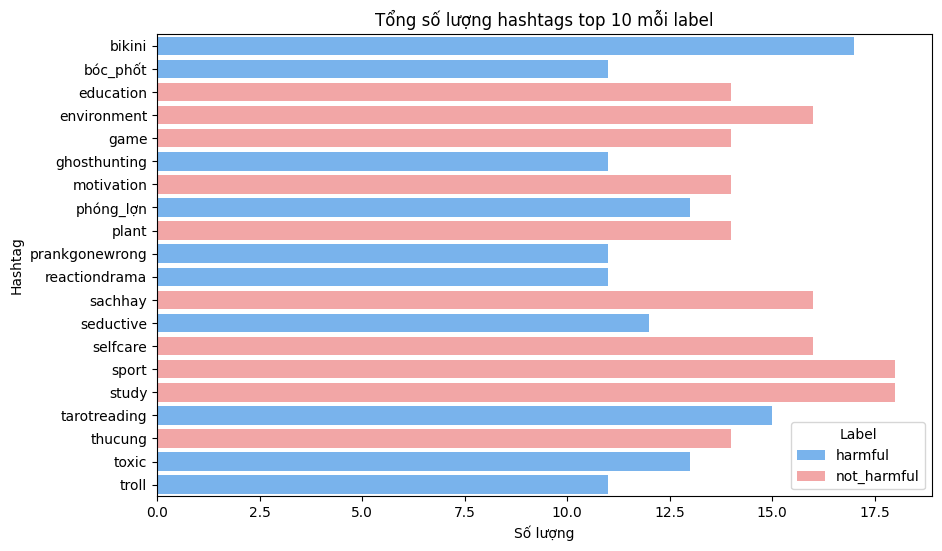


=== Pivot table label vs hashtag ===


label,harmful,not_harmful
hashtag,,
bikini,17,0
bóc_phốt,11,0
education,0,14
environment,0,16
game,0,14
ghosthunting,11,0
motivation,0,14
phóng_lợn,13,0
plant,0,14


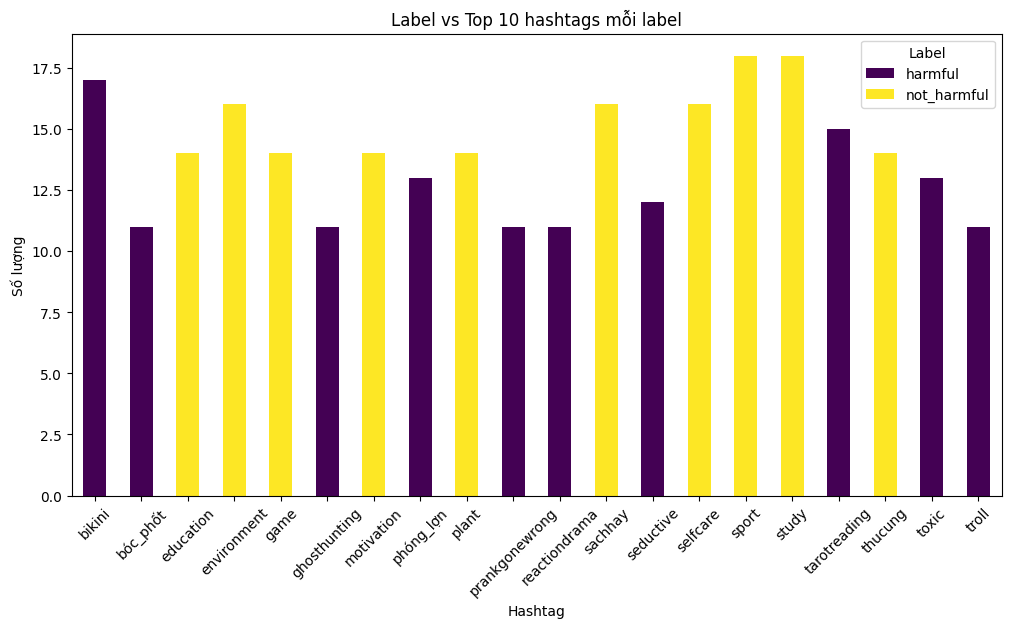


✅ Kiểm tra hoàn tất.


In [11]:
print("\n" + "="*40)
print("GIAI ĐOẠN 8: KIỂM TRA DỮ LIỆU (VERIFICATION)")
print("="*40)
try:
    print(f"Đang đọc lại file vừa lưu: {os.path.basename(OUTPUT_CSV_SMALL)}...\n")
    df_verify = pd.read_csv(OUTPUT_CSV_SMALL)
    eda_tiktok_advanced_labelwise(df=df_verify, top_n_per_label=10)
    
    
    print("\n✅ Kiểm tra hoàn tất.")
    
except Exception as e:
    print(f"Lỗi khi kiểm tra dữ liệu: {e}")
